In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Train Data

In [4]:
df = pd.read_csv('./train.csv')

In [5]:
def visualize(series,n):
    # 상위 n개만 시각화
    top_categories = series.value_counts().head(n).index
    # 상위 10개 범주에 대한 데이터만 필터링하고, 그 중에서도 'value_counts'의 내림차순으로 정렬
    top_categories_sorted = series[series.isin(top_categories)].value_counts().index
    # 시각화를 위한 DataFrame 생성
    top_categories_df = series[series.isin(top_categories)].to_frame(name='category')
    # 시각화
    plt.figure(figsize=(10, 6))
    sns.countplot(y='category', data=top_categories_df, order=top_categories_sorted)
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

In [37]:
def visualize_top_categories_with_ratio(df, column_name, top_n=10, target='is_converted'):
    # 상위 N개의 카테고리 선택
    top_categories = df[column_name].value_counts().head(top_n).index

    # 각 카테고리 별로 target의 True, False 개수 집계
    agg_df = df[df[column_name].isin(top_categories)].groupby([column_name, target]).size().unstack(fill_value=0)

    # True와 False의 합계를 기준으로 내림차순 정렬
    agg_df['total'] = agg_df.sum(axis=1)
    agg_df_sorted = agg_df.sort_values(by='total', ascending=False).drop('total', axis=1)

    # Stacked bar plot 시각화
    ax = agg_df_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))
    plt.title(f'Top {top_n} {column_name} by Conversion Status - Descending Order')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.legend(title='Is Converted', labels=['False', 'True'], loc='lower right')
    plt.gca().invert_yaxis()  # y축의 순서를 뒤집어 내림차순으로 표시

    # True Ratio 값을 막대 위에 표시
    for index, (category, row) in enumerate(agg_df_sorted.iterrows()):
        total_count = row.sum()
        true_ratio = row[True] / total_count if total_count > 0 else 0
        # 막대의 오른쪽 끝에 True Ratio 텍스트 추가
        ax.text(row.sum(), index, f' True Ratio: {true_ratio:.2f}', va='center', ha='left')

    # # 각 막대의 끝에 Total Count 텍스트 추가
    # for p in ax.patches:
    #     ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f' {int(p.get_width())}', va='center')

    plt.show()

In [6]:
df['inquiry_type'].unique()

array(['Quotation or purchase consultation', 'Product Information',
       'Quotation or Purchase Consultation', 'Other',
       'Usage or technical consultation', 'Trainings', 'Services',
       'Sales Inquiry', 'Etc.', 'Technical Support',
       'Usage or Technical Consultation', 'Technical Consultation',
       'Request for Partnership', nan, 'sales', 'technical',
       'usage or technical consultation',
       'usage_or_technical_consultation', 'other',
       'quotation_or_purchase_consultation', 'other_', 'Request a Demo',
       'Request for Distributorship', 'Request for quotation or purchase',
       'Request for technical consulting', '(Select ID_Needs)',
       'One Quick:Flex', 'AIO', 'Needs', 'Purchase',
       'technical_consultation', 'Customer Suggestions', 'Event Inquiry',
       'Others', 'OEM/ODM Request', 'Hospital TV', 'others',
       'i want to know the details about it', 'EDUCATIONAL EQUIPMENTS',
       'Digital platform', 'TV interactive', 'teach',
       'Di

In [7]:
df['inquiry_type'].nunique()

71

In [ ]:
inquiry_type = pd.DataFrame(df['inquiry_type'].unique())

In [ ]:
inquiry_type.to_csv('./inquiry_type.csv',index= False, header=['inquiry_type_col'],encoding = 'utf-8-sig')

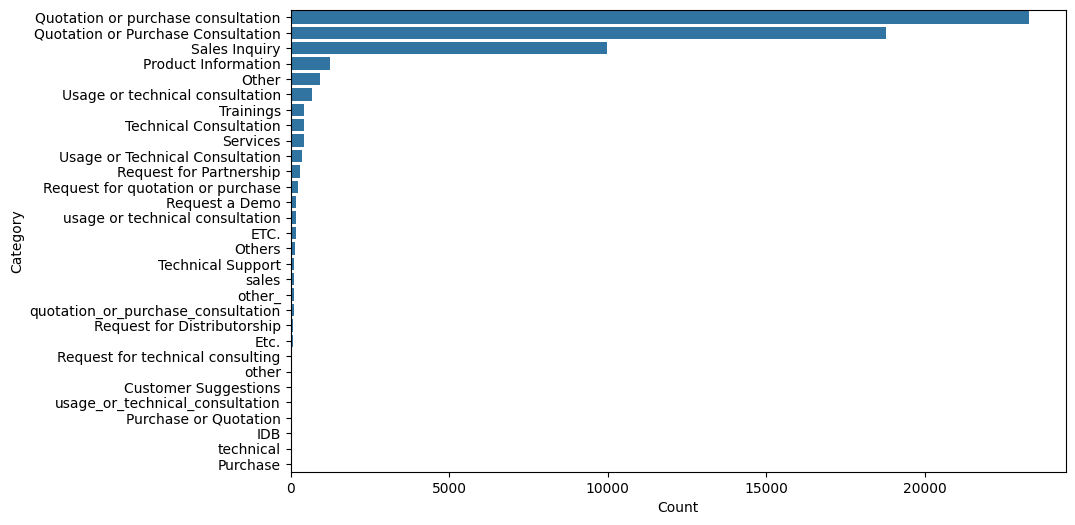

In [ ]:
visualize(df['inquiry_type'],30)

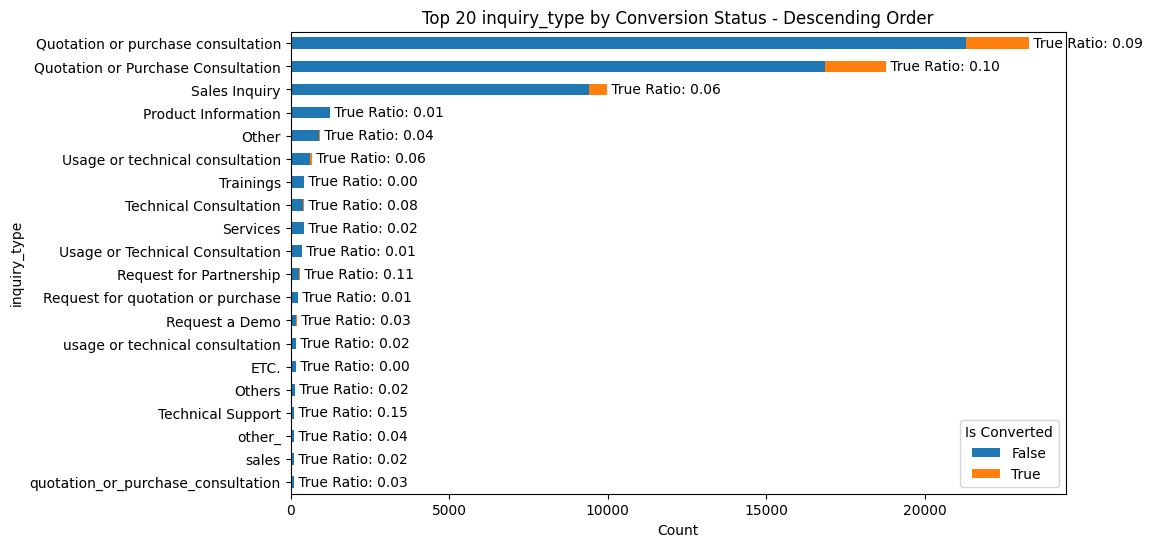

In [38]:
visualize_top_categories_with_ratio(df, 'inquiry_type', top_n=20, target='is_converted')

소문자화, 언더바 제거

In [8]:
df['trans_inquiry_type'] = df['inquiry_type'].str.lower()
df['trans_inquiry_type'] = df['trans_inquiry_type'].str.replace('_', ' ')

In [9]:
df['trans_inquiry_type'].nunique()

60

In [10]:
df['trans_inquiry_type'].unique()

array(['quotation or purchase consultation', 'product information',
       'other', 'usage or technical consultation', 'trainings',
       'services', 'sales inquiry', 'etc.', 'technical support',
       'technical consultation', 'request for partnership', nan, 'sales',
       'technical', 'other ', 'request a demo',
       'request for distributorship', 'request for quotation or purchase',
       'request for technical consulting', '(select id needs)',
       'one quick:flex', 'aio', 'needs', 'purchase',
       'customer suggestions', 'event inquiry', 'others',
       'oem/odm request', 'hospital tv',
       'i want to know the details about it', 'educational equipments',
       'digital platform', 'tv interactive', 'teach',
       'display textbook and photos', 'high inch 86 / 98 or 110',
       'quotation ', 'purchase or quotation', 'display product',
       'first info and pricing',
       'estoy buscando para ecuador este producto lg magnit micro led, para un cliente de 138 pulgad

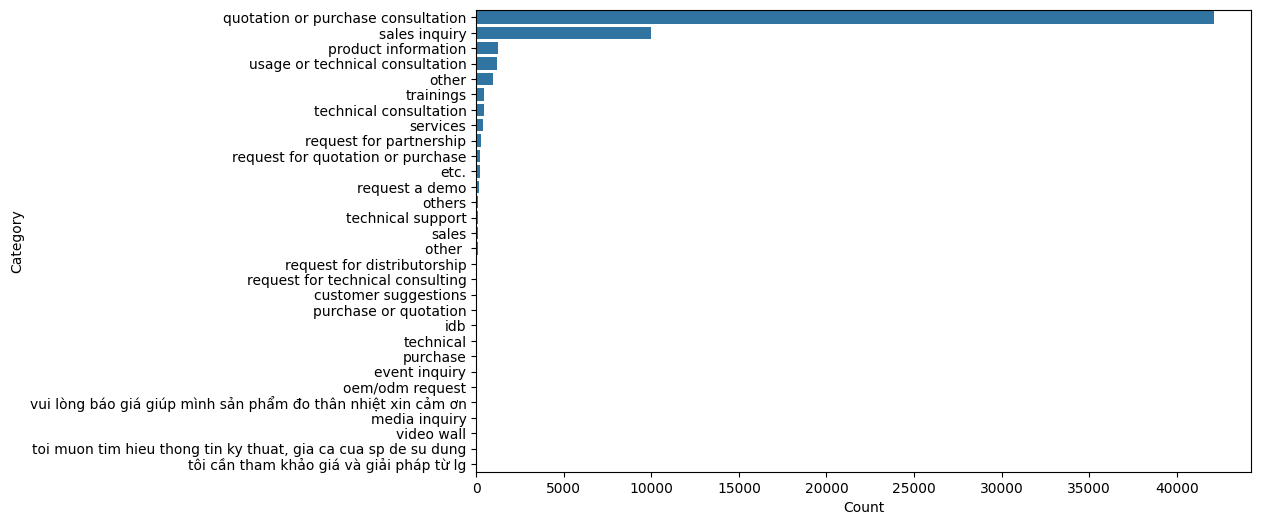

In [ ]:
visualize(df['trans_inquiry_type'],30)

In [ ]:
trans_inquiry_type = pd.DataFrame(df['trans_inquiry_type'].unique())

In [ ]:
trans_inquiry_type.to_csv('./trans_inquiry_type.csv',index= False, header=['trans_inquiry_type_col'],encoding = 'utf-8-sig')

other, other , others 합치기

In [11]:
df['trans_inquiry_type'] = df['trans_inquiry_type'].str.replace('others','other')
df['trans_inquiry_type'] = df['trans_inquiry_type'].str.replace('other ','other')

In [12]:
df['trans_inquiry_type'].nunique()

58

In [15]:
df['trans_inquiry_type'].value_counts(dropna = False)

quotation or purchase consultation                                                                                     42138
sales inquiry                                                                                                           9981
product information                                                                                                     1237
usage or technical consultation                                                                                         1190
other                                                                                                                   1180
NaN                                                                                                                      941
trainings                                                                                                                434
technical consultation                                                                                                   433


In [18]:
trans_inquiry_type = df['trans_inquiry_type'].value_counts(dropna = False).to_frame()
trans_inquiry_type = trans_inquiry_type.reset_index().rename(columns = {'index' : 'trans_inquiry_type', 'trans_inquiry_type': 'count'})
trans_inquiry_type.to_csv('./trans_inquiry_type_v2.csv',index= False, header=['trans_inquiry_type_col','count'],encoding = 'utf-8-sig')

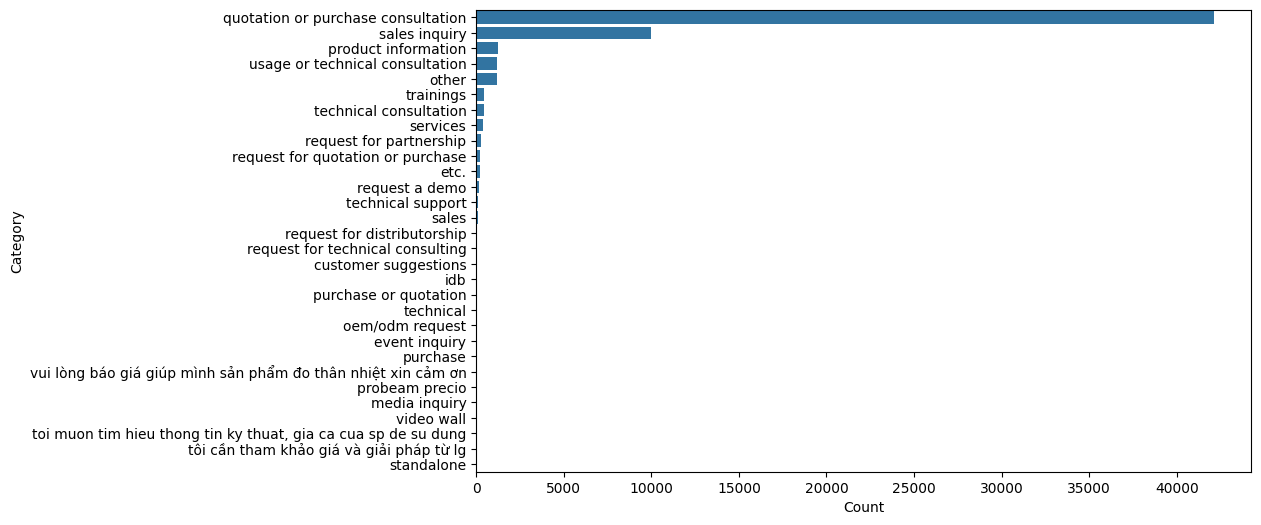

In [36]:
visualize(df['trans_inquiry_type'],30)

언어 감지

In [ ]:
!pip install googletrans==4.0.0rc1

In [24]:
from googletrans import Translator

translator = Translator()

In [30]:
sentence = df['inquiry_type'].unique()[0] # 언어 감지를 원하는 문장 설정
detected = translator.detect(sentence)   # 입력한 문장의 언어 감지

print(sentence, detected.lang)


Quotation or purchase consultation
Quotation or purchase consultation en


In [35]:
for i in range(len(df['inquiry_type'].unique())):
  sentence = df['inquiry_type'].unique()[i]
  detected = translator.detect(sentence)
  if detected.lang != 'en':
    print(sentence, detected.lang)


nan ht
estoy buscando para Ecuador este producto LG MAGNIT micro LED, para un cliente de 138 pulgadas, con envió marítimo. es
Hola me pueden cotizar 19 pantallas interactivas de 100 pulgadas entregadas en Guayaquil -Ecuador. es
Vui lòng báo giá giúp mình sản phẩm đo thân nhiệt Xin cảm ơn vi
Probeam precio la
Pantallas Interactivas para Clinicas es
Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución One Quick:  es
Intégrateur historique du George V fr
Toi muon tim hieu thong tin ky thuat, gia ca cua sp de su dung vi
tôi cần tham khảo giá và giải pháp từ LG vi
Preciso de um monitor médico para radiografia convencional e tomogrtafia. pt
Evento_SdelEstero pt


72

In [ ]:
if __name__ == '__main__':
    translator = Google_Translator()

    # Select the language you want to translate to
    tgt_lang_code = input('# Enter language code (Default: ko): ')

    if tgt_lang_code == '':
        tgt_lang_code = 'ko'

    print('>> You chose: {}\n'.format(tgt_lang_code))

    # Select the option you want to use
    input_message = '# Pick an option: text or file: \n'

    for index, option in enumerate(options):
        input_message += f'{index + 1}. {option}\n'

    input_message += 'Enter your choice: '

    option = input(input_message)

    print('>> You chose: {}\n'.format(options[int(option) - 1]))

    # Translate the text
    if option == '1':
        input_text = input('Press Enter to translate: ')
        result = translator.translate(input_text, tgt_lang_code)

        print('[{}] -> [{}]'.format(result['src_lang'], result['tgt_lang']))
        print('=' * 50)
        print('Source Text : {}'.format(result['src_text']))
        print('Target Text : {}'.format(result['tgt_text']))
    # Translate the file
    elif option == '2':
        file_path = input('Enter file path: ')
        result = translator.translate_file(file_path, tgt_lang_code)

        print('[{}] -> [{}]'.format(result['src_lang'], result['tgt_lang']))
        print('=' * 50)
        print('Source Text : [{}]\n'.format(result['src_text']))
        print('Target Text : [{}]'.format(result['tgt_text']))

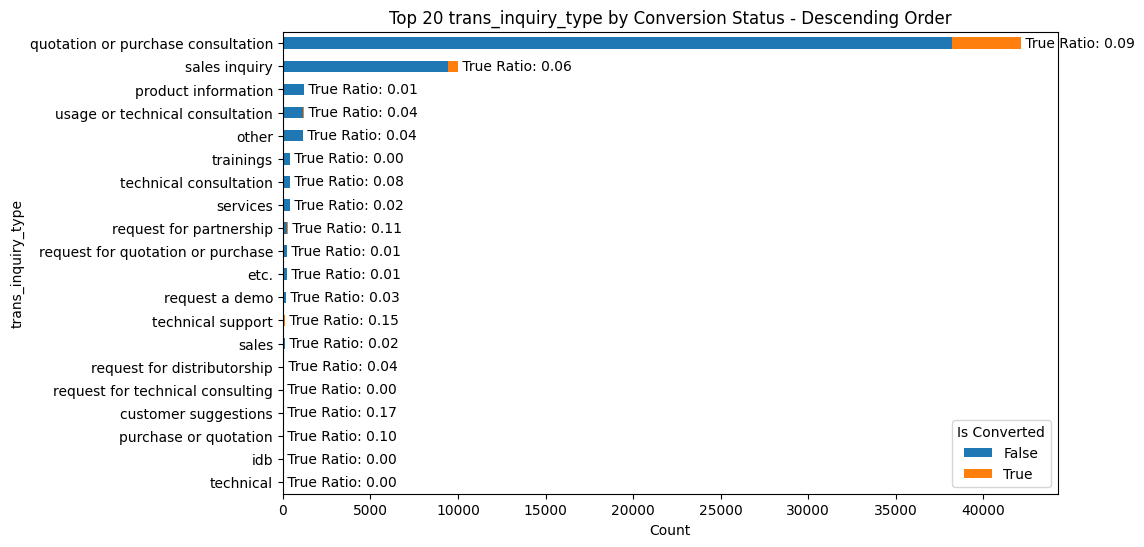

In [39]:
visualize_top_categories_with_ratio(df, 'trans_inquiry_type', top_n=20, target='is_converted')

# Test data

In [19]:
test = pd.read_csv('./submission.csv')

In [21]:
test['inquiry_type'].nunique()

15

In [20]:
test['inquiry_type'].unique()

array([nan, 'Quotation or Purchase Consultation', 'Product Information',
       'Technical Consultation', 'Others', 'Request for Partnership',
       'Usage or Technical Consultation', 'Services',
       'Customer Suggestions', 'Request a Demo', 'Trainings', 'Other',
       'OEM/ODM Request', 'Media Inquiry', 'other_',
       'Request for Distributorship'], dtype=object)